In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [8]:
#Importing the data
data = pd.read_csv('Mall_Customers_Synthetic.csv')
data.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0,1,56,53,95
1,2,46,16,99
2,3,32,17,60
3,4,60,127,97
4,5,25,115,63


In [11]:
#data preprocessing
X= data[['Age','Annual Income (k$)','Spending Score (1-100)']]
X

,Age,Annual Income (k$),Spending Score (1-100)
0,56,53,95
1,46,16,99
2,32,17,60
3,60,127,97
4,25,115,63
...,...,...,...
195,49,38,8
196,49,107,93
197,41,127,26
198,58,60,74


In [12]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)

Text(0, 0.5, 'Within cluster sum of ')

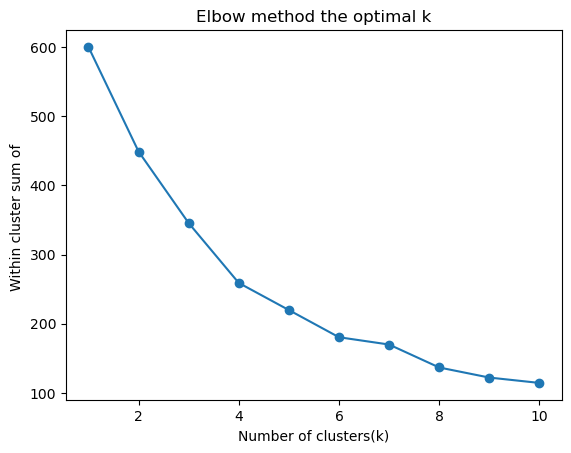

In [26]:
#determining optimal k 
wscc = []
K = range(1,11)
for k in K:
    km = KMeans(n_clusters = k ,random_state = 42)
    km.fit(x_scaled)
    wscc.append(km.inertia_)
plt.plot(K,wscc,marker = 'o')
plt.title('Elbow method the optimal k')
plt.xlabel('Number of clusters(k)')
plt.ylabel('Within cluster sum of ')

In [20]:
for k in range(2,8):
    km=KMeans(n_clusters = k ,random_state = 42)
    labels=km.fit_predict(x_scaled)
    score = silhouette_score(x_scaled,labels)
    print(f'shilhouette score for k ={k}:{score}')

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/joblib/externals/loky/backend/context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/joblib/externals/loky/backend/context.py", line 217, in _count_physical_cores
    raise ValueError(


shilhouette score for k =2:0.24310262073693678
shilhouette score for k =3:0.25680320676179497
shilhouette score for k =4:0.2964320357191702
shilhouette score for k =5:0.29612520474307075
shilhouette score for k =6:0.30811332443588785
shilhouette score for k =7:0.28571758470711933


In [21]:
kmeans = KMeans(n_clusters = 5,random_state = 42)
cluster = kmeans.fit_predict(x_scaled)
data['cluster'] = cluster
data.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,56,53,95,3
1,2,46,16,99,3
2,3,32,17,60,1
3,4,60,127,97,0
4,5,25,115,63,1


Text(0.5, 1.0, 'customer segment visualization')

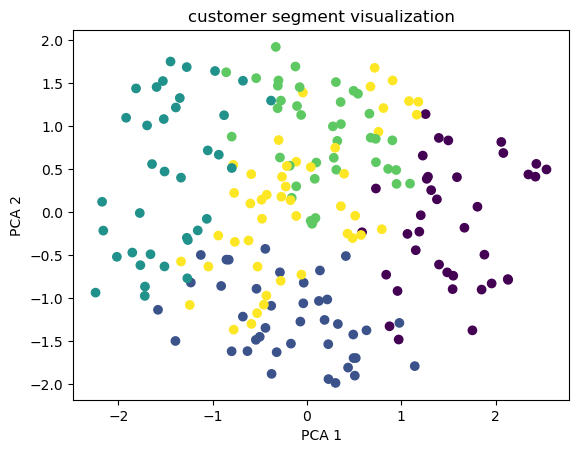

In [24]:
pca = PCA(n_components =2)
x_pca = pca.fit_transform(x_scaled)
plt.scatter(x_pca[:,0],x_pca[:,1],c = cluster)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('customer segment visualization')
